# ChEMBL Database

[ChEMBL](https://www.ebi.ac.uk/chembl/) - это вручную созданная база данных биоактивных молекул с лекарственными свойствами. Он объединяет химические, биоактивные и геномные данные, чтобы помочь преобразовать геномную информацию в новые эффективные лекарства.

Он поддерживается Европейским институтом биоинформатики (EBI) и Европейской лабораторией молекулярной биологии (EMBL), базирующейся в Геномном кампусе Wellcome Trust, Хинкстон, Великобритания.

База данных, первоначально известная как StARlite, была разработана биотехнологической компанией Inpharmatica Ltd., позже приобретенной Galapagos NV. Данные были получены для EMBL в 2008 году с наградой Wellcome Trust, что привело к созданию группы хемогеномики ChEMBL в EMBL-EBI под руководством Джона Оверингтона.

# Получение данных

Воспользуемся открытым api ChEMBL и библиотекой RDKit

In [1]:
# # chembl api client
# ! pip install chembl_webresource_client


# # RDKit - Open source toolkit for cheminformatics
# !conda install python=3.6 -y
# ! conda install -c conda-forge rdkit -y

In [2]:
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski
from rdkit.Chem.EState import EState
from rdkit.Chem.MolStandardize import rdMolStandardize
from chembl_webresource_client.new_client import new_client
from numpy.random import seed
from numpy.random import randn
from scipy.stats import mannwhitneyu
import seaborn as sns
from IPython.display import display
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

RDKit WARNING: [16:21:57] Enabling RDKit 2019.09.3 jupyter extensions
[16:21:57] Enabling RDKit 2019.09.3 jupyter extensions


# Target 

Tyrosyl-DNA phosphodiesterase 1 is an enzyme that in humans is encoded by the TDP1 gene.

The protein encoded by this gene is involved in repairing stalled topoisomerase I-DNA complexes by catalyzing the hydrolysis of the phosphodiester bond between the tyrosine residue of Type I topoisomerase and the 3-prime phosphate of DNA. This protein may also remove glycolate from single-stranded DNA containing 3-prime phosphoglycolate, suggesting a role in repair of free-radical mediated DNA double-strand breaks.

In [3]:
from chembl_webresource_client.settings import Settings
Settings.Instance().TIMEOUT = 30


# target
TARGET = 'CHEMBL1075138'
activity = new_client.activity
res = activity.filter(target_chembl_id=TARGET).filter(standard_type="IC50")
activities_df = pd.DataFrame.from_dict(res)
activities_df

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,3132522,[],CHEMBL1068068,Inhibition of human tyrosyl-DNA phosphodiester...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Tyrosyl-DNA phosphodiesterase 1,9606,None,None,IC50,uM,UO_0000065,None,8.43
1,None,3132523,[],CHEMBL1068068,Inhibition of human tyrosyl-DNA phosphodiester...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Tyrosyl-DNA phosphodiesterase 1,9606,None,None,IC50,uM,UO_0000065,None,35.0
2,None,3132524,[],CHEMBL1068068,Inhibition of human tyrosyl-DNA phosphodiester...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Tyrosyl-DNA phosphodiesterase 1,9606,None,None,IC50,uM,UO_0000065,None,14.0
3,None,3132525,[],CHEMBL1068068,Inhibition of human tyrosyl-DNA phosphodiester...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Tyrosyl-DNA phosphodiesterase 1,9606,None,None,IC50,uM,UO_0000065,None,5.0
4,None,3132526,[],CHEMBL1068069,Inhibition of human tyrosyl-DNA phosphodiester...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Tyrosyl-DNA phosphodiesterase 1,9606,None,None,IC50,uM,UO_0000065,None,7.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590,None,20683048,[],CHEMBL4623531,Inhibition of TDP1 (unknown origin) expressed ...,B,None,None,BAO_0000190,BAO_0000019,...,Homo sapiens,Tyrosyl-DNA phosphodiesterase 1,9606,None,None,IC50,uM,UO_0000065,None,100.0
591,None,20683049,[],CHEMBL4623531,Inhibition of TDP1 (unknown origin) expressed ...,B,None,None,BAO_0000190,BAO_0000019,...,Homo sapiens,Tyrosyl-DNA phosphodiesterase 1,9606,None,None,IC50,uM,UO_0000065,None,100.0
592,None,20683050,[],CHEMBL4623531,Inhibition of TDP1 (unknown origin) expressed ...,B,None,None,BAO_0000190,BAO_0000019,...,Homo sapiens,Tyrosyl-DNA phosphodiesterase 1,9606,None,None,IC50,uM,UO_0000065,None,100.0
593,None,20683055,[],CHEMBL4623531,Inhibition of TDP1 (unknown origin) expressed ...,B,None,None,BAO_0000190,BAO_0000019,...,Homo sapiens,Tyrosyl-DNA phosphodiesterase 1,9606,None,None,IC50,uM,UO_0000065,None,100.0


In [4]:
activities_df.standard_type.unique()

array(['IC50'], dtype=object)

# Очистка данных
## Убираем лишние колонки

Оставляем следующие:

- 'activity_id', уникальный идентификатор активности
- 'assay_type', тип источника
- 'canonical_smiles', SMILE-нотация лиганда
- 'document_year', год издания документа
- 'molecule_chembl_id', уникальный идентификатор лиганда 
- 'standard_type', тип активности(У нас должен быь только IC50)
- 'standard_units', единицы измерения
- 'standard_value', значение в стандартных единицах

In [5]:
activities_df = activities_df[
    ['activity_id', 
     'assay_type',
     'canonical_smiles', 
     'document_year', 
     'molecule_chembl_id',
     'standard_type', 
     'standard_units',
     'standard_value'
    ]]
activities_df

,activity_id,assay_type,canonical_smiles,document_year,molecule_chembl_id,standard_type,standard_units,standard_value
0,3132522,B,C[C@]12CC[C@H]3[C@@H](CCC4=CC(=O)CC[C@@]43C)[C...,2010,CHEMBL387152,IC50,nM,8430.0
1,3132523,B,CSc1ncnc2c1NCN2CC(=O)[C@H]1CC[C@H]2[C@@H]3CCC4...,2010,CHEMBL591237,IC50,nM,35000.0
2,3132524,B,Fc1cccc(Cl)c1/C=N/N=C1c2ccccc2-c2ccccc21,2010,CHEMBL601298,IC50,nM,14000.0
3,3132525,B,O=c1c2ccccc2c2ccccc2c(=O)n1-c1cccc2c1ccc1c3ccc...,2010,CHEMBL591472,IC50,nM,5000.0
4,3132526,B,CCOC(=O)CN(C(=O)COC(=O)Cc1c[nH]c2ccccc12)c1ccc...,2010,CHEMBL601283,IC50,nM,7940.0
...,...,...,...,...,...,...,...,...
590,20683048,B,CC(=O)O[C@H]1CC[C@@]2(C)[C@@H](CC[C@]3(C)[C@@H...,2020,CHEMBL4644911,IC50,nM,100000.0
591,20683049,B,CO[C@@H]1C[C@@]2(C)[C@@H](CC[C@]3(C)[C@@H]2CC=...,2020,CHEMBL4647916,IC50,nM,100000.0
592,20683050,B,CC(C)c1cc2c(cc1O)CC[C@H]1[C@@](C)(CO)CCC[C@]21C,2020,CHEMBL4642797,IC50,nM,100000.0
593,20683055,B,C=C1C(=O)[C@]23C[C@H]1CC[C@H]2[C@]1(C)CC[C@@H]...,2020,CHEMBL4636385,IC50,nM,100000.0


## Очищаем от пропущенных значений

In [6]:
activities_df = activities_df.dropna()
activities_df

,activity_id,assay_type,canonical_smiles,document_year,molecule_chembl_id,standard_type,standard_units,standard_value
0,3132522,B,C[C@]12CC[C@H]3[C@@H](CCC4=CC(=O)CC[C@@]43C)[C...,2010,CHEMBL387152,IC50,nM,8430.0
1,3132523,B,CSc1ncnc2c1NCN2CC(=O)[C@H]1CC[C@H]2[C@@H]3CCC4...,2010,CHEMBL591237,IC50,nM,35000.0
2,3132524,B,Fc1cccc(Cl)c1/C=N/N=C1c2ccccc2-c2ccccc21,2010,CHEMBL601298,IC50,nM,14000.0
3,3132525,B,O=c1c2ccccc2c2ccccc2c(=O)n1-c1cccc2c1ccc1c3ccc...,2010,CHEMBL591472,IC50,nM,5000.0
4,3132526,B,CCOC(=O)CN(C(=O)COC(=O)Cc1c[nH]c2ccccc12)c1ccc...,2010,CHEMBL601283,IC50,nM,7940.0
...,...,...,...,...,...,...,...,...
590,20683048,B,CC(=O)O[C@H]1CC[C@@]2(C)[C@@H](CC[C@]3(C)[C@@H...,2020,CHEMBL4644911,IC50,nM,100000.0
591,20683049,B,CO[C@@H]1C[C@@]2(C)[C@@H](CC[C@]3(C)[C@@H]2CC=...,2020,CHEMBL4647916,IC50,nM,100000.0
592,20683050,B,CC(C)c1cc2c(cc1O)CC[C@H]1[C@@](C)(CO)CCC[C@]21C,2020,CHEMBL4642797,IC50,nM,100000.0
593,20683055,B,C=C1C(=O)[C@]23C[C@H]1CC[C@H]2[C@]1(C)CC[C@@H]...,2020,CHEMBL4636385,IC50,nM,100000.0


In [7]:
activities_df['standard_value'] = activities_df['standard_value'].astype(float)

/tmp/ipykernel_167149/2946573829.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  activities_df['standard_value'] = activities_df['standard_value'].astype(float)


## Разделим вещества по биологической активности на активные, неактивные, и непонятно-какие

Данные биологической активности приведены в виде IC50, nM(наномоль/литр). Будем считать активными вещества, IC50 которых менее 1000nM, неактивными - те, у которых более 10k nM. Все что посередине - непонятно-какие.

In [8]:
activities_df['activity_class'] = activities_df.standard_value.map(
    lambda x: "active" if x<=1000 else("non-active" if x>=10000 else "not-sure")
)
activities_df

/tmp/ipykernel_167149/50338483.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  activities_df['activity_class'] = activities_df.standard_value.map(


,activity_id,assay_type,canonical_smiles,document_year,molecule_chembl_id,standard_type,standard_units,standard_value,activity_class
0,3132522,B,C[C@]12CC[C@H]3[C@@H](CCC4=CC(=O)CC[C@@]43C)[C...,2010,CHEMBL387152,IC50,nM,8430.0,not-sure
1,3132523,B,CSc1ncnc2c1NCN2CC(=O)[C@H]1CC[C@H]2[C@@H]3CCC4...,2010,CHEMBL591237,IC50,nM,35000.0,non-active
2,3132524,B,Fc1cccc(Cl)c1/C=N/N=C1c2ccccc2-c2ccccc21,2010,CHEMBL601298,IC50,nM,14000.0,non-active
3,3132525,B,O=c1c2ccccc2c2ccccc2c(=O)n1-c1cccc2c1ccc1c3ccc...,2010,CHEMBL591472,IC50,nM,5000.0,not-sure
4,3132526,B,CCOC(=O)CN(C(=O)COC(=O)Cc1c[nH]c2ccccc12)c1ccc...,2010,CHEMBL601283,IC50,nM,7940.0,not-sure
...,...,...,...,...,...,...,...,...,...
590,20683048,B,CC(=O)O[C@H]1CC[C@@]2(C)[C@@H](CC[C@]3(C)[C@@H...,2020,CHEMBL4644911,IC50,nM,100000.0,non-active
591,20683049,B,CO[C@@H]1C[C@@]2(C)[C@@H](CC[C@]3(C)[C@@H]2CC=...,2020,CHEMBL4647916,IC50,nM,100000.0,non-active
592,20683050,B,CC(C)c1cc2c(cc1O)CC[C@H]1[C@@](C)(CO)CCC[C@]21C,2020,CHEMBL4642797,IC50,nM,100000.0,non-active
593,20683055,B,C=C1C(=O)[C@]23C[C@H]1CC[C@H]2[C@]1(C)CC[C@@H]...,2020,CHEMBL4636385,IC50,nM,100000.0,non-active


In [9]:
activities_df.columns

Index(['activity_id', 'assay_type', 'canonical_smiles', 'document_year',
       'molecule_chembl_id', 'standard_type', 'standard_units',
       'standard_value', 'activity_class'],
      dtype='object')

In [10]:
columns = ['canonical_smiles', 'molecule_chembl_id','standard_value','activity_class', 'document_year']
activities_df = activities_df[columns].reset_index()
activities_df

,index,canonical_smiles,molecule_chembl_id,standard_value,activity_class,document_year
0,0,C[C@]12CC[C@H]3[C@@H](CCC4=CC(=O)CC[C@@]43C)[C...,CHEMBL387152,8430.0,not-sure,2010
1,1,CSc1ncnc2c1NCN2CC(=O)[C@H]1CC[C@H]2[C@@H]3CCC4...,CHEMBL591237,35000.0,non-active,2010
2,2,Fc1cccc(Cl)c1/C=N/N=C1c2ccccc2-c2ccccc21,CHEMBL601298,14000.0,non-active,2010
3,3,O=c1c2ccccc2c2ccccc2c(=O)n1-c1cccc2c1ccc1c3ccc...,CHEMBL591472,5000.0,not-sure,2010
4,4,CCOC(=O)CN(C(=O)COC(=O)Cc1c[nH]c2ccccc12)c1ccc...,CHEMBL601283,7940.0,not-sure,2010
...,...,...,...,...,...,...
587,590,CC(=O)O[C@H]1CC[C@@]2(C)[C@@H](CC[C@]3(C)[C@@H...,CHEMBL4644911,100000.0,non-active,2020
588,591,CO[C@@H]1C[C@@]2(C)[C@@H](CC[C@]3(C)[C@@H]2CC=...,CHEMBL4647916,100000.0,non-active,2020
589,592,CC(C)c1cc2c(cc1O)CC[C@H]1[C@@](C)(CO)CCC[C@]21C,CHEMBL4642797,100000.0,non-active,2020
590,593,C=C1C(=O)[C@]23C[C@H]1CC[C@H]2[C@]1(C)CC[C@@H]...,CHEMBL4636385,100000.0,non-active,2020


## Дескрипторы Липински и правило пяти

Правило Липински, также известное как правило пяти — эмпирическое правило, помогающее определить, обладает ли химическое соединение с определённой фармакологической или биологической активностью свойствами, делающими его перорально активным лекарственным средством для человека. Правило было сформулировано Кристофером Липински в 1997 году. Правило основано на наблюдении, что большинство перорально вводимых лекарств представляют собой относительно небольшие и умеренно липофильные молекулы.

Правило описывает молекулярные свойства, важные для фармакокинетики препарата в организме человека, включая его всасывание, распределение, метаболизм и выведение. Однако, правило не позволяет предсказать, является ли соединение фармакологически активным.

Это правило важно учитывать при создании лекарств, когда фармакологически активный препарат поэтапно оптимизируется для повышения активности и селективности соединения, а также для обеспечения поддержания физико-химических свойств, присущих соединениям, подчиняющимся правилу Липински. Соединения, соответствующие правилу Липинского, менее интенсивно расходуются во время клинических испытаний и, следовательно, имеют повышенную вероятность выхода на рынок.

Правило Липински гласит, что в общем случае перорально активный препарат должен нарушать не более одного из следующих условий:

- Не более 5 донорных водородных связей (общее количество азот-водородных и кислород-водородных связей);
- Не более 10 акцепторных водородных связей (общее количество атомов азота или кислорода);
- Молекулярная масса соединения менее 500 a.e.м.;
- Коэффициент распределения октанол-вода ($\log{P}$), не должен превышать 5.

Необходимо отметить, что все числа кратны пяти, что объясняет происхождение названия правила. Как и во многих других эмпирических правилах, таких как правила Болдуина для замыкания цикла, есть много исключений.

## Используемые дескрипторы

- Дескрипторы Липински
 + MolWeight
 + MolLogP
 + NumHDonors
 + NumHAcceptors
- Структурные дескрипторы:
 + "NumSatHet", число насыщеных гетероциклов
 + "NumSatCarb", число ненасыщеных гетероциклов
 + "NumArHet", число ароматических гетероциклов
 + "NumArCarb", число ароматических гетероциклов
 + "NumRotBonds", число связей способных к вращению
- Дескрипторы [EState](https://sci-hub.yncjkj.com/10.1021/ci00001a012)
 + MaxEstateIndex
 + MaxAbsEstateIndex
 + MinEstateIndex
 + MinAbsEstateIndex



In [11]:
def LipinskyDescriptors(smiles):
    moldata = []
    broken_smiles = []
    rows = []
    for i, smile in enumerate(smiles):
        try:
            # build molecule by smiles
            mol = Chem.MolFromSmiles(smile)
            mol = rdMolStandardize.Cleanup(mol)
            # descriptors from rule of 5
            descMolWeight = Descriptors.MolWt(mol)
            descMolLogP = Descriptors.MolLogP(mol)
            descNumHDonors = Descriptors.NumHDonors(mol)
            descNumHAcceptors = Descriptors.NumHAcceptors(mol)
            
            # Structural descriptors
            descNumSatHet = Descriptors.NumSaturatedHeterocycles(mol)
            descNumSatCarb = Descriptors.NumSaturatedCarbocycles(mol)
            descNumArHet = Descriptors.NumAromaticHeterocycles(mol)
            descNumArCarb = Descriptors.NumAromaticCarbocycles(mol)
            descNumRotBonds = Descriptors.NumRotatableBonds(mol)
            
            # EState descriptors
            descMaxEI = EState.MaxEStateIndex(mol)
            descMinEI = EState.MinEStateIndex(mol)
            descMaxAEI = EState.MaxAbsEStateIndex(mol)
            descMinAEI = EState.MinAbsEStateIndex(mol)
            
            
            row = np.array(
                [descMolWeight, descMolLogP,descNumHDonors,descNumHAcceptors] +
                [descNumSatHet, descNumSatCarb, descNumArHet, descNumArCarb, descNumRotBonds] +
                [descMaxAEI, descMaxEI, descMinAEI, descMinEI]
            )
            rows.append(row)
        except:
            broken_smiles.append(smile)
            
    res = pd.DataFrame(data=rows, 
                       columns=["MW", "LogP", "NumDonors", "NumAcceptors"] +
                       ["NumSatHet", "NumSatCarb","NumArHet", "NumArCarb", "NumRotBonds"] + 
                       ["MaxAEI", "MaxEI", "MinAEI", "MinEI"]
                      )
    return res, broken_smiles

In [12]:
df, broken = LipinskyDescriptors(activities_df.canonical_smiles)

RDKit INFO: [16:22:07] Initializing MetalDisconnector
RDKit INFO: [16:22:07] Running MetalDisconnector
RDKit INFO: [16:22:07] Initializing Normalizer
RDKit INFO: [16:22:07] Running Normalizer
RDKit INFO: [16:22:07] Initializing MetalDisconnector
RDKit INFO: [16:22:07] Running MetalDisconnector
RDKit INFO: [16:22:07] Initializing Normalizer
RDKit INFO: [16:22:07] Running Normalizer
RDKit INFO: [16:22:07] Initializing MetalDisconnector
RDKit INFO: [16:22:07] Running MetalDisconnector
RDKit INFO: [16:22:07] Initializing Normalizer
RDKit INFO: [16:22:07] Running Normalizer
RDKit INFO: [16:22:07] Initializing MetalDisconnector
RDKit INFO: [16:22:07] Running MetalDisconnector
RDKit INFO: [16:22:07] Initializing Normalizer
RDKit INFO: [16:22:07] Running Normalizer
RDKit INFO: [16:22:07] Initializing MetalDisconnector
RDKit INFO: [16:22:07] Running MetalDisconnector
RDKit INFO: [16:22:07] Initializing Normalizer
RDKit INFO: [16:22:07] Running Normalizer
RDKit INFO: [16:22:07] Initializing Meta

[16:22:07] Initializing MetalDisconnector
[16:22:07] Running MetalDisconnector
[16:22:07] Initializing Normalizer
[16:22:07] Running Normalizer
[16:22:07] Initializing MetalDisconnector
[16:22:07] Running MetalDisconnector
[16:22:07] Initializing Normalizer
[16:22:07] Running Normalizer
[16:22:07] Initializing MetalDisconnector
[16:22:07] Running MetalDisconnector
[16:22:07] Initializing Normalizer
[16:22:07] Running Normalizer
[16:22:07] Initializing MetalDisconnector
[16:22:07] Running MetalDisconnector
[16:22:07] Initializing Normalizer
[16:22:07] Running Normalizer
[16:22:07] Initializing MetalDisconnector
[16:22:07] Running MetalDisconnector
[16:22:07] Initializing Normalizer
[16:22:07] Running Normalizer
[16:22:07] Initializing MetalDisconnector
[16:22:07] Running MetalDisconnector
[16:22:07] Initializing Normalizer
[16:22:07] Running Normalizer
[16:22:07] Initializing MetalDisconnector
[16:22:07] Running MetalDisconnector
[16:22:07] Initializing Normalizer
[16:22:07] Running Nor

RDKit INFO: [16:22:07] Running MetalDisconnector
RDKit INFO: [16:22:07] Initializing Normalizer
RDKit INFO: [16:22:07] Running Normalizer
RDKit INFO: [16:22:07] Initializing MetalDisconnector
RDKit INFO: [16:22:07] Running MetalDisconnector
RDKit INFO: [16:22:07] Initializing Normalizer
RDKit INFO: [16:22:07] Running Normalizer
RDKit INFO: [16:22:07] Initializing MetalDisconnector
RDKit INFO: [16:22:07] Running MetalDisconnector
RDKit INFO: [16:22:07] Initializing Normalizer
RDKit INFO: [16:22:07] Running Normalizer
RDKit INFO: [16:22:07] Initializing MetalDisconnector
RDKit INFO: [16:22:07] Running MetalDisconnector
RDKit INFO: [16:22:07] Initializing Normalizer
RDKit INFO: [16:22:07] Running Normalizer
RDKit INFO: [16:22:07] Initializing MetalDisconnector
RDKit INFO: [16:22:07] Running MetalDisconnector
RDKit INFO: [16:22:07] Initializing Normalizer
RDKit INFO: [16:22:07] Running Normalizer
RDKit INFO: [16:22:07] Initializing MetalDisconnector
RDKit INFO: [16:22:07] Running MetalDisc

RDKit INFO: [16:22:07] Running MetalDisconnector
RDKit INFO: [16:22:07] Initializing Normalizer
RDKit INFO: [16:22:07] Running Normalizer
RDKit INFO: [16:22:07] Initializing MetalDisconnector
RDKit INFO: [16:22:07] Running MetalDisconnector
RDKit INFO: [16:22:07] Initializing Normalizer
RDKit INFO: [16:22:07] Running Normalizer
RDKit INFO: [16:22:07] Initializing MetalDisconnector
RDKit INFO: [16:22:07] Running MetalDisconnector
RDKit INFO: [16:22:07] Initializing Normalizer
RDKit INFO: [16:22:07] Running Normalizer
RDKit INFO: [16:22:07] Initializing MetalDisconnector
RDKit INFO: [16:22:07] Running MetalDisconnector
RDKit INFO: [16:22:07] Initializing Normalizer
RDKit INFO: [16:22:07] Running Normalizer
RDKit INFO: [16:22:07] Initializing MetalDisconnector
RDKit INFO: [16:22:07] Running MetalDisconnector
RDKit INFO: [16:22:07] Initializing Normalizer
RDKit INFO: [16:22:07] Running Normalizer
RDKit INFO: [16:22:07] Initializing MetalDisconnector
RDKit INFO: [16:22:07] Running MetalDisc

alDisconnector
[16:22:07] Initializing Normalizer
[16:22:07] Running Normalizer
[16:22:07] Initializing MetalDisconnector
[16:22:07] Running MetalDisconnector
[16:22:07] Initializing Normalizer
[16:22:07] Running Normalizer
[16:22:07] Initializing MetalDisconnector
[16:22:07] Running MetalDisconnector
[16:22:07] Initializing Normalizer
[16:22:07] Running Normalizer
[16:22:07] Initializing MetalDisconnector
[16:22:07] Running MetalDisconnector
[16:22:07] Initializing Normalizer
[16:22:07] Running Normalizer
[16:22:07] Initializing MetalDisconnector
[16:22:07] Running MetalDisconnector
[16:22:07] Initializing Normalizer
[16:22:07] Running Normalizer
[16:22:07] Initializing MetalDisconnector
[16:22:07] Running MetalDisconnector
[16:22:07] Initializing Normalizer
[16:22:07] Running Normalizer
[16:22:07] Initializing MetalDisconnector
[16:22:07] Running MetalDisconnector
[16:22:07] Initializing Normalizer
[16:22:07] Running Normalizer
[16:22:07] Initializing MetalDisconnector
[16:22:07] Run

RDKit INFO: [16:22:08] Initializing MetalDisconnector
RDKit INFO: [16:22:08] Running MetalDisconnector
RDKit INFO: [16:22:08] Initializing Normalizer
RDKit INFO: [16:22:08] Running Normalizer
RDKit INFO: [16:22:08] Initializing MetalDisconnector
RDKit INFO: [16:22:08] Running MetalDisconnector
RDKit INFO: [16:22:08] Initializing Normalizer
RDKit INFO: [16:22:08] Running Normalizer
RDKit INFO: [16:22:08] Initializing MetalDisconnector
RDKit INFO: [16:22:08] Running MetalDisconnector
RDKit INFO: [16:22:08] Initializing Normalizer
RDKit INFO: [16:22:08] Running Normalizer
RDKit INFO: [16:22:08] Initializing MetalDisconnector
RDKit INFO: [16:22:08] Running MetalDisconnector
RDKit INFO: [16:22:08] Initializing Normalizer
RDKit INFO: [16:22:08] Running Normalizer
RDKit INFO: [16:22:08] Initializing MetalDisconnector
RDKit INFO: [16:22:08] Running MetalDisconnector
RDKit INFO: [16:22:08] Initializing Normalizer
RDKit INFO: [16:22:08] Running Normalizer
RDKit INFO: [16:22:08] Initializing Meta

RDKit INFO: [16:22:08] Running MetalDisconnector
RDKit INFO: [16:22:08] Initializing Normalizer
RDKit INFO: [16:22:08] Running Normalizer
RDKit INFO: [16:22:08] Initializing MetalDisconnector
RDKit INFO: [16:22:08] Running MetalDisconnector
RDKit INFO: [16:22:08] Initializing Normalizer
RDKit INFO: [16:22:08] Running Normalizer
RDKit INFO: [16:22:08] Initializing MetalDisconnector
RDKit INFO: [16:22:08] Running MetalDisconnector
RDKit INFO: [16:22:08] Initializing Normalizer
RDKit INFO: [16:22:08] Running Normalizer
RDKit INFO: [16:22:08] Initializing MetalDisconnector
RDKit INFO: [16:22:08] Running MetalDisconnector
RDKit INFO: [16:22:08] Initializing Normalizer
RDKit INFO: [16:22:08] Running Normalizer
RDKit INFO: [16:22:08] Initializing MetalDisconnector
RDKit INFO: [16:22:08] Running MetalDisconnector
RDKit INFO: [16:22:08] Initializing Normalizer
RDKit INFO: [16:22:08] Running Normalizer
RDKit INFO: [16:22:08] Initializing MetalDisconnector
RDKit INFO: [16:22:08] Running MetalDisc

alizing MetalDisconnector
[16:22:07] Running MetalDisconnector
[16:22:07] Initializing Normalizer
[16:22:07] Running Normalizer
[16:22:07] Initializing MetalDisconnector
[16:22:07] Running MetalDisconnector
[16:22:07] Initializing Normalizer
[16:22:07] Running Normalizer
[16:22:07] Initializing MetalDisconnector
[16:22:07] Running MetalDisconnector
[16:22:07] Initializing Normalizer
[16:22:07] Running Normalizer
[16:22:07] Initializing MetalDisconnector
[16:22:07] Running MetalDisconnector
[16:22:07] Initializing Normalizer
[16:22:07] Running Normalizer
[16:22:07] Initializing MetalDisconnector
[16:22:07] Running MetalDisconnector
[16:22:07] Initializing Normalizer
[16:22:07] Running Normalizer
[16:22:07] Initializing MetalDisconnector
[16:22:07] Running MetalDisconnector
[16:22:07] Initializing Normalizer
[16:22:07] Running Normalizer
[16:22:07] Initializing MetalDisconnector
[16:22:07] Running MetalDisconnector
[16:22:07] Initializing Normalizer
[16:22:07] Running Normalizer
[16:22:0

RDKit INFO: [16:22:08] Running Normalizer
RDKit INFO: [16:22:08] Initializing MetalDisconnector
RDKit INFO: [16:22:08] Running MetalDisconnector
RDKit INFO: [16:22:08] Initializing Normalizer
RDKit INFO: [16:22:08] Running Normalizer
RDKit INFO: [16:22:08] Initializing MetalDisconnector
RDKit INFO: [16:22:08] Running MetalDisconnector
RDKit INFO: [16:22:08] Initializing Normalizer
RDKit INFO: [16:22:08] Running Normalizer
RDKit INFO: [16:22:08] Initializing MetalDisconnector
RDKit INFO: [16:22:08] Running MetalDisconnector
RDKit INFO: [16:22:08] Initializing Normalizer
RDKit INFO: [16:22:08] Running Normalizer
RDKit INFO: [16:22:08] Initializing MetalDisconnector
RDKit INFO: [16:22:08] Running MetalDisconnector
RDKit INFO: [16:22:08] Initializing Normalizer
RDKit INFO: [16:22:08] Running Normalizer
RDKit INFO: [16:22:08] Initializing MetalDisconnector
RDKit INFO: [16:22:08] Running MetalDisconnector
RDKit INFO: [16:22:08] Initializing Normalizer
RDKit INFO: [16:22:08] Running Normalize

RDKit INFO: [16:22:08] Initializing MetalDisconnector
RDKit INFO: [16:22:08] Running MetalDisconnector
RDKit INFO: [16:22:08] Initializing Normalizer
RDKit INFO: [16:22:08] Running Normalizer
RDKit INFO: [16:22:08] Initializing MetalDisconnector
RDKit INFO: [16:22:08] Running MetalDisconnector
RDKit INFO: [16:22:08] Initializing Normalizer
RDKit INFO: [16:22:08] Running Normalizer
RDKit INFO: [16:22:08] Initializing MetalDisconnector
RDKit INFO: [16:22:08] Running MetalDisconnector
RDKit INFO: [16:22:08] Initializing Normalizer
RDKit INFO: [16:22:08] Running Normalizer
RDKit INFO: [16:22:08] Initializing MetalDisconnector
RDKit INFO: [16:22:08] Running MetalDisconnector
RDKit INFO: [16:22:08] Initializing Normalizer
RDKit INFO: [16:22:08] Running Normalizer
RDKit INFO: [16:22:08] Initializing MetalDisconnector
RDKit INFO: [16:22:08] Running MetalDisconnector
RDKit INFO: [16:22:08] Initializing Normalizer
RDKit INFO: [16:22:08] Running Normalizer
RDKit INFO: [16:22:08] Initializing Meta

malizer
[16:22:07] Initializing MetalDisconnector
[16:22:07] Running MetalDisconnector
[16:22:07] Initializing Normalizer
[16:22:07] Running Normalizer
[16:22:07] Initializing MetalDisconnector
[16:22:07] Running MetalDisconnector
[16:22:07] Initializing Normalizer
[16:22:07] Running Normalizer
[16:22:07] Initializing MetalDisconnector
[16:22:07] Running MetalDisconnector
[16:22:07] Initializing Normalizer
[16:22:07] Running Normalizer
[16:22:07] Initializing MetalDisconnector
[16:22:07] Running MetalDisconnector
[16:22:07] Initializing Normalizer
[16:22:07] Running Normalizer
[16:22:07] Initializing MetalDisconnector
[16:22:07] Running MetalDisconnector
[16:22:07] Initializing Normalizer
[16:22:07] Running Normalizer
[16:22:07] Initializing MetalDisconnector
[16:22:07] Running MetalDisconnector
[16:22:07] Initializing Normalizer
[16:22:07] Running Normalizer
[16:22:07] Initializing MetalDisconnector
[16:22:07] Running MetalDisconnector
[16:22:07] Initializing Normalizer
[16:22:07] Run

RDKit INFO: [16:22:09] Initializing MetalDisconnector
RDKit INFO: [16:22:09] Running MetalDisconnector
RDKit INFO: [16:22:09] Initializing Normalizer
RDKit INFO: [16:22:09] Running Normalizer
RDKit INFO: [16:22:09] Initializing MetalDisconnector
RDKit INFO: [16:22:09] Running MetalDisconnector
RDKit INFO: [16:22:09] Initializing Normalizer
RDKit INFO: [16:22:09] Running Normalizer
RDKit INFO: [16:22:09] Initializing MetalDisconnector
RDKit INFO: [16:22:09] Running MetalDisconnector
RDKit INFO: [16:22:09] Initializing Normalizer
RDKit INFO: [16:22:09] Running Normalizer
RDKit INFO: [16:22:09] Initializing MetalDisconnector
RDKit INFO: [16:22:09] Running MetalDisconnector
RDKit INFO: [16:22:09] Initializing Normalizer
RDKit INFO: [16:22:09] Running Normalizer
RDKit INFO: [16:22:09] Initializing MetalDisconnector
RDKit INFO: [16:22:09] Running MetalDisconnector
RDKit INFO: [16:22:09] Initializing Normalizer
RDKit INFO: [16:22:09] Running Normalizer
RDKit INFO: [16:22:09] Initializing Meta

8] Initializing MetalDisconnector
[16:22:08] Running MetalDisconnector
[16:22:08] Initializing Normalizer
[16:22:08] Running Normalizer
[16:22:08] Initializing MetalDisconnector
[16:22:08] Running MetalDisconnector
[16:22:08] Initializing Normalizer
[16:22:08] Running Normalizer
[16:22:08] Initializing MetalDisconnector
[16:22:08] Running MetalDisconnector
[16:22:08] Initializing Normalizer
[16:22:08] Running Normalizer
[16:22:08] Initializing MetalDisconnector
[16:22:08] Running MetalDisconnector
[16:22:08] Initializing Normalizer
[16:22:08] Running Normalizer
[16:22:08] Initializing MetalDisconnector
[16:22:08] Running MetalDisconnector
[16:22:08] Initializing Normalizer
[16:22:08] Running Normalizer
[16:22:08] Initializing MetalDisconnector
[16:22:08] Running MetalDisconnector
[16:22:08] Initializing Normalizer
[16:22:08] Running Normalizer
[16:22:08] Initializing MetalDisconnector
[16:22:08] Running MetalDisconnector
[16:22:08] Initializing Normalizer
[16:22:08] Running Normalizer


[16:22:08] Running MetalDisconnector
[16:22:08] Initializing Normalizer
[16:22:08] Running Normalizer
[16:22:08] Initializing MetalDisconnector
[16:22:08] Running MetalDisconnector
[16:22:08] Initializing Normalizer
[16:22:08] Running Normalizer
[16:22:08] Initializing MetalDisconnector
[16:22:08] Running MetalDisconnector
[16:22:08] Initializing Normalizer
[16:22:08] Running Normalizer
[16:22:08] Initializing MetalDisconnector
[16:22:08] Running MetalDisconnector
[16:22:08] Initializing Normalizer
[16:22:08] Running Normalizer
[16:22:08] Initializing MetalDisconnector
[16:22:08] Running MetalDisconnector
[16:22:08] Initializing Normalizer
[16:22:08] Running Normalizer
[16:22:08] Initializing MetalDisconnector
[16:22:08] Running MetalDisconnector
[16:22:08] Initializing Normalizer
[16:22:08] Running Normalizer
[16:22:08] Initializing MetalDisconnector
[16:22:08] Running MetalDisconnector
[16:22:08] Initializing Normalizer
[16:22:08] Running Normalizer
[16:22:08] Initializing MetalDisco

In [13]:
activities_df = pd.concat([df, activities_df], axis=1)
activities_df

8] Initializing MetalDisconnector
[16:22:08] Running MetalDisconnector
[16:22:08] Initializing Normalizer
[16:22:08] Running Normalizer
[16:22:08] Initializing MetalDisconnector
[16:22:08] Running MetalDisconnector
[16:22:08] Initializing Normalizer
[16:22:08] Running Normalizer
[16:22:08] Initializing MetalDisconnector
[16:22:08] Running MetalDisconnector
[16:22:08] Initializing Normalizer
[16:22:08] Running Normalizer
[16:22:08] Initializing MetalDisconnector
[16:22:08] Running MetalDisconnector
[16:22:08] Initializing Normalizer
[16:22:08] Running Normalizer
[16:22:08] Initializing MetalDisconnector
[16:22:08] Running MetalDisconnector
[16:22:08] Initializing Normalizer
[16:22:08] Running Normalizer
[16:22:08] Initializing MetalDisconnector
[16:22:08] Running MetalDisconnector
[16:22:08] Initializing Normalizer
[16:22:08] Running Normalizer
[16:22:08] Initializing MetalDisconnector
[16:22:08] Running MetalDisconnector
[16:22:08] Initializing Normalizer
[16:22:08] Running Normalizer


,MW,LogP,NumDonors,NumAcceptors,NumSatHet,NumSatCarb,NumArHet,NumArCarb,NumRotBonds,MaxAEI,MaxEI,MinAEI,MinEI,index,canonical_smiles,molecule_chembl_id,standard_value,activity_class,document_year
0,549.527,5.8716,0.0,5.0,0.0,3.0,0.0,1.0,5.0,13.281180,13.281180,0.059991,-3.971150,0,C[C@]12CC[C@H]3[C@@H](CCC4=CC(=O)CC[C@@]43C)[C...,CHEMBL387152,8430.0,not-sure,2010
1,480.678,5.1051,1.0,7.0,0.0,3.0,1.0,0.0,4.0,13.748208,13.748208,0.103571,0.103571,1,CSc1ncnc2c1NCN2CC(=O)[C@H]1CC[C@H]2[C@@H]3CCC4...,CHEMBL591237,35000.0,non-active,2010
2,334.781,5.3310,0.0,2.0,0.0,0.0,0.0,3.0,2.0,13.804850,13.804850,0.238967,-0.417896,2,Fc1cccc(Cl)c1/C=N/N=C1c2ccccc2-c2ccccc21,CHEMBL601298,14000.0,non-active,2010
3,449.509,6.9637,0.0,3.0,0.0,0.0,1.0,6.0,1.0,13.903311,13.903311,0.312122,-0.312122,3,O=c1c2ccccc2c2ccccc2c(=O)n1-c1cccc2c1ccc1c3ccc...,CHEMBL591472,5000.0,not-sure,2010
4,412.417,2.9890,1.0,5.0,0.0,0.0,1.0,2.0,8.0,13.212795,13.212795,0.008216,-0.624728,4,CCOC(=O)CN(C(=O)COC(=O)Cc1c[nH]c2ccccc12)c1ccc...,CHEMBL601283,7940.0,not-sure,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
587,514.747,6.7752,2.0,4.0,0.0,4.0,0.0,0.0,2.0,12.889766,12.889766,0.035825,-1.029232,590,CC(=O)O[C@H]1CC[C@@]2(C)[C@@H](CC[C@]3(C)[C@@H...,CHEMBL4644911,100000.0,non-active,2020
588,502.736,6.4425,2.0,4.0,1.0,3.0,0.0,0.0,2.0,12.898040,12.898040,0.030231,-1.020090,591,CO[C@@H]1C[C@@]2(C)[C@@H](CC[C@]3(C)[C@@H]2CC=...,CHEMBL4647916,100000.0,non-active,2020
589,302.458,4.5182,2.0,2.0,0.0,1.0,0.0,1.0,2.0,10.325770,10.325770,0.042232,0.042232,592,CC(C)c1cc2c(cc1O)CC[C@H]1[C@@](C)(CO)CCC[C@]21C,CHEMBL4642797,100000.0,non-active,2020
590,318.457,3.0960,2.0,3.0,0.0,4.0,0.0,0.0,0.0,13.086868,13.086868,0.034931,-0.579740,593,C=C1C(=O)[C@]23C[C@H]1CC[C@H]2[C@]1(C)CC[C@@H]...,CHEMBL4636385,100000.0,non-active,2020


:09] Running MetalDisconnector
[16:22:09] Initializing Normalizer
[16:22:09] Running Normalizer
[16:22:09] Initializing MetalDisconnector
[16:22:09] Running MetalDisconnector
[16:22:09] Initializing Normalizer
[16:22:09] Running Normalizer
[16:22:09] Initializing MetalDisconnector
[16:22:09] Running MetalDisconnector
[16:22:09] Initializing Normalizer
[16:22:09] Running Normalizer
[16:22:09] Initializing MetalDisconnector
[16:22:09] Running MetalDisconnector
[16:22:09] Initializing Normalizer
[16:22:09] Running Normalizer
[16:22:09] Initializing MetalDisconnector
[16:22:09] Running MetalDisconnector
[16:22:09] Initializing Normalizer
[16:22:09] Running Normalizer
[16:22:09] Initializing MetalDisconnector
[16:22:09] Running MetalDisconnector
[16:22:09] Initializing Normalizer
[16:22:09] Running Normalizer
[16:22:09] Initializing MetalDisconnector
[16:22:09] Running MetalDisconnector
[16:22:09] Initializing Normalizer
[16:22:09] Running Normalizer
[16:22:09] Initializing MetalDisconnecto

## Преобразуем IC50 в pIC50

Для более равномерного распределения значений активности сконвертируем IC50 в pIC50.
$$pIC_{50} = -log_{10}IC_{50}$$

In [14]:
def IC_to_pIC(IC50):
    #convert nM to mol/l
    molar = IC50*(10**-6)
    pIC50 = -np.log10(molar)
    return pIC50

<AxesSubplot:>

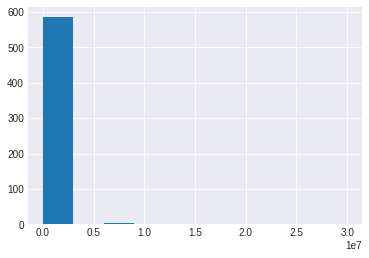

In [15]:
activities_df.standard_value.hist()

In [16]:
activities_df.standard_value+=10**10

<AxesSubplot:>

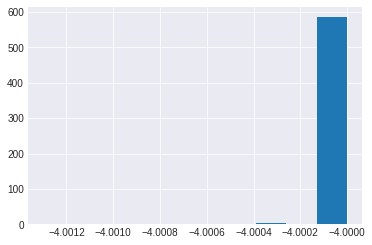

In [17]:
activities_df['pIC50'] = activities_df.standard_value.map(IC_to_pIC)
activities_df.pIC50.hist()

## Удалим непонятно-какие вещества, оставив только активные и неактивные

In [18]:
activities_df = activities_df[activities_df.activity_class!='not-sure']
activities_df.groupby('activity_class').count()

,MW,LogP,NumDonors,NumAcceptors,NumSatHet,NumSatCarb,NumArHet,NumArCarb,NumRotBonds,MaxAEI,MaxEI,MinAEI,MinEI,index,canonical_smiles,molecule_chembl_id,standard_value,document_year,pIC50
activity_class,,,,,,,,,,,,,,,,,,,
active,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83
non-active,413,413,413,413,413,413,413,413,413,413,413,413,413,413,413,413,413,413,413


# Анализ полученных данных
## Pairplot 

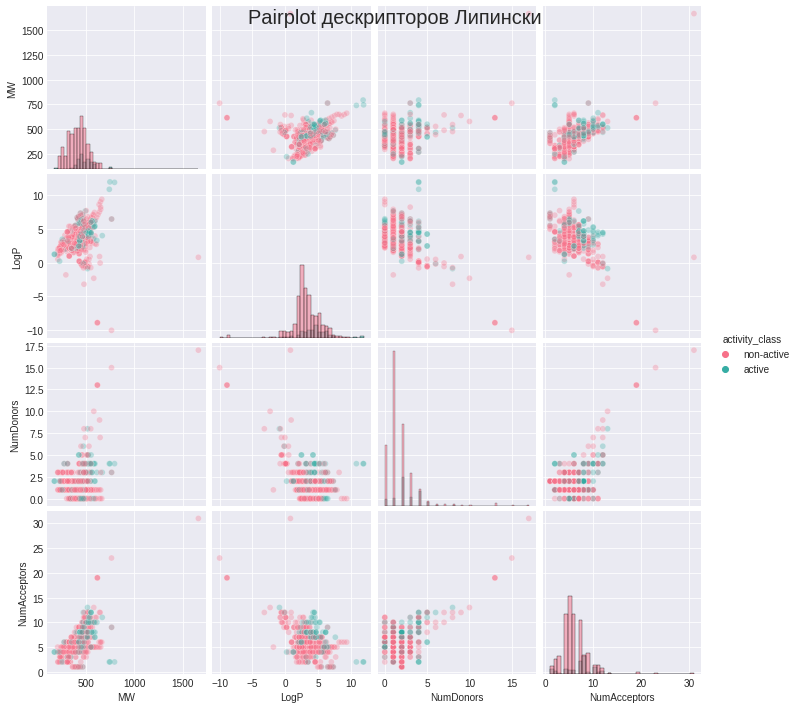

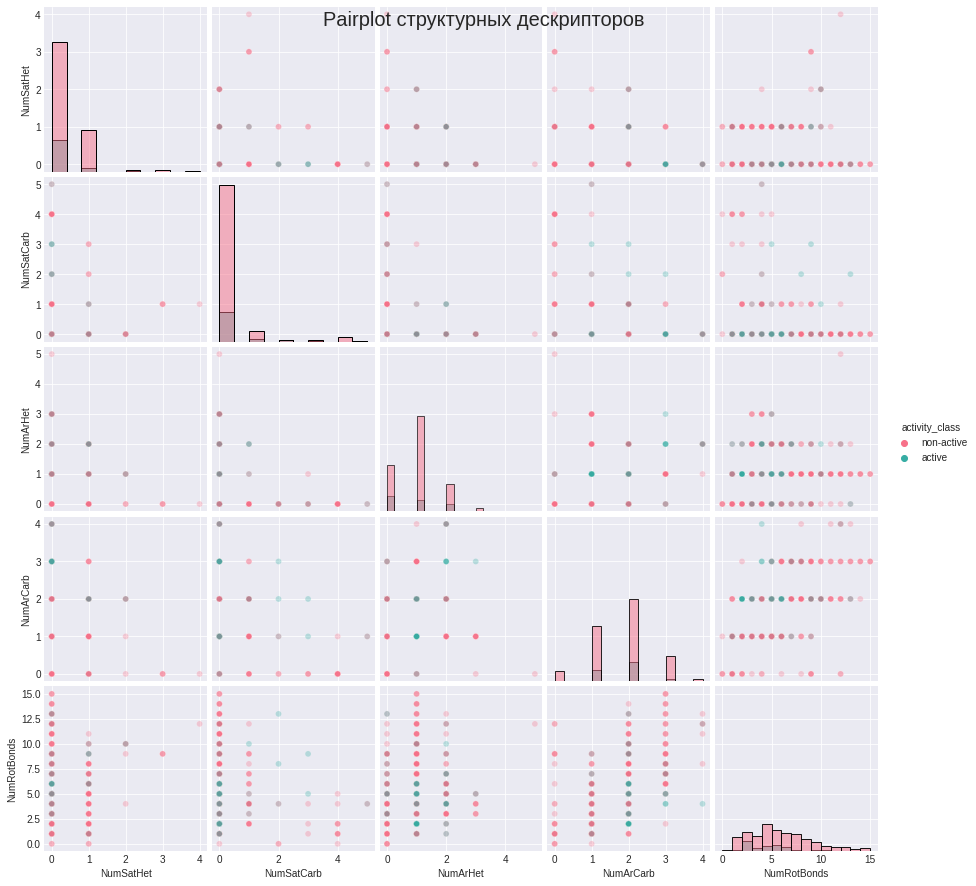

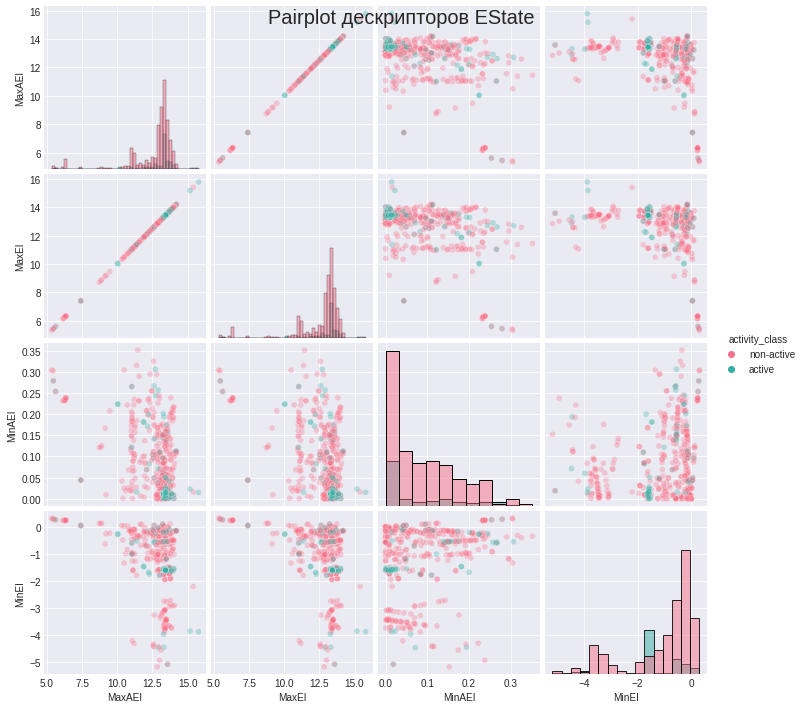

In [19]:
# lipinski descriptors
selection_lip = [
    'activity_class',
    'MW',
    'LogP',
    'NumDonors',
    'NumAcceptors']

# structural descriptors
selection_struct = [     
    'activity_class',   
    "NumSatHet",
    "NumSatCarb", 
    "NumArHet",
    "NumArCarb", 
    "NumRotBonds", 
    ]

# EState descriptors
selection_ES = [
        'activity_class',   
        'MaxAEI',
        'MaxEI',
        'MinAEI',
        'MinEI'
               ]

sns.pairplot(activities_df[selection_lip], hue='activity_class', 
             kind='scatter', diag_kind='hist', 
             plot_kws={'alpha': 0.3}, palette='husl')
plt.suptitle("Pairplot дескрипторов Липински", size=20)
plt.savefig('imgs/PairplotLip.png',dpi=300)

sns.pairplot(activities_df[selection_struct], hue='activity_class', 
             kind='scatter', diag_kind='hist', 
             plot_kws={'alpha': 0.3}, palette='husl')
plt.suptitle("Pairplot структурных дескрипторов", size=20)
plt.savefig('imgs/PairplotStruct.png',dpi=300)


sns.pairplot(activities_df[selection_ES], hue='activity_class', 
             kind='scatter', diag_kind='hist', 
             plot_kws={'alpha': 0.3}, palette='husl')
plt.suptitle("Pairplot дескрипторов EState", size=20)
plt.savefig('imgs/PairplotEState.png',dpi=300)

Видим что по всем дескрипторам кроме pIC50 активные и неактивные лиганды имеют схожее распределение, явных корреляций не видно за исключением MaxEI/MaxAEI. Исключать их пока не будем. Попробуем сделать boxplot дескрипторов для активных и неактивных лигандов.


## Boxplot дескрипторов

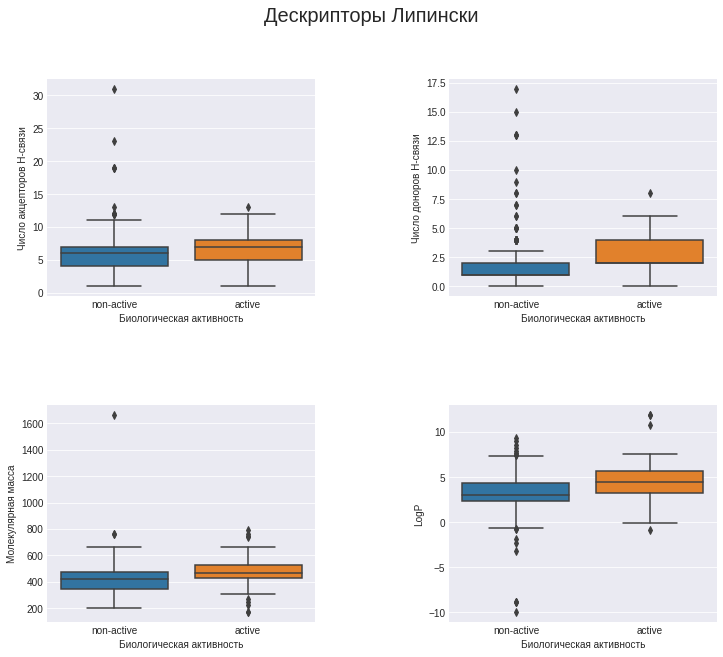

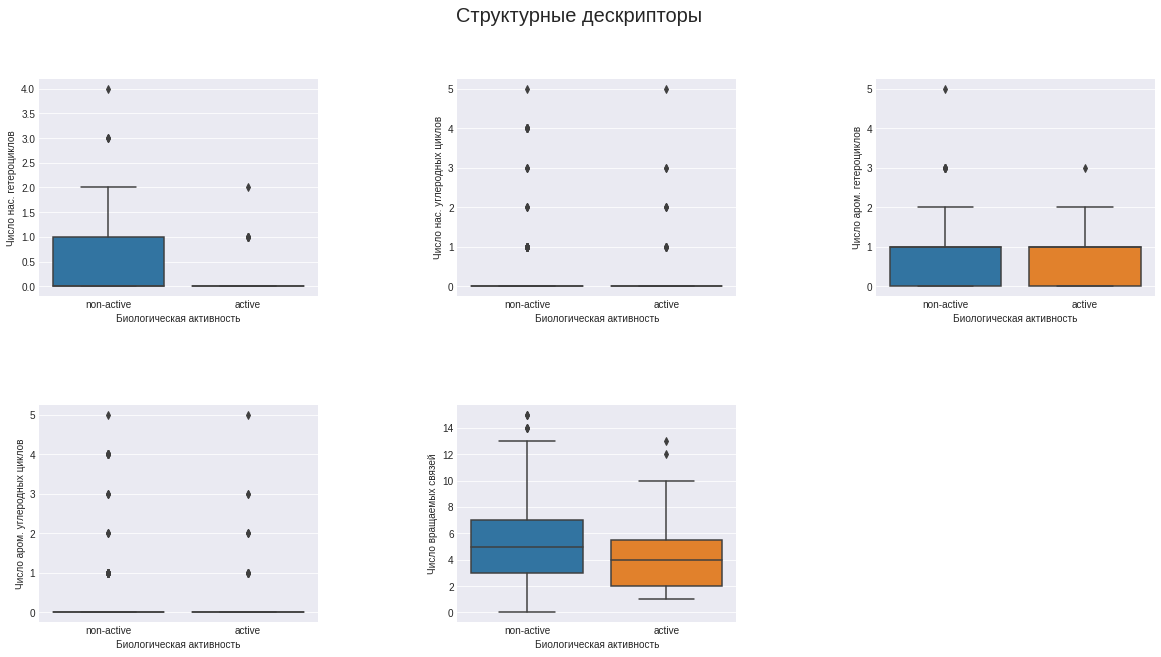

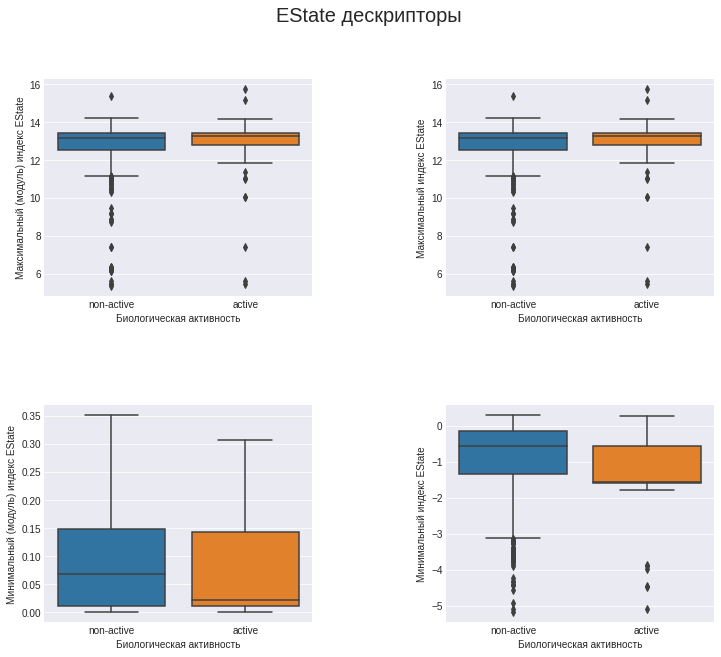

In [20]:
fig = plt.figure(figsize=(12,10))
plt.suptitle("Дескрипторы Липински",size=20)
fig.subplots_adjust(hspace=0.5,wspace=0.5)

fig.add_subplot(2,2,1)
sns.boxplot(x='activity_class', y='NumAcceptors',data=activities_df)
plt.xlabel("Биологическая активность")
plt.ylabel("Число акцепторов H-связи")

fig.add_subplot(2,2,2)
sns.boxplot(x='activity_class', y='NumDonors',data=activities_df)
plt.xlabel("Биологическая активность")
plt.ylabel("Число доноров H-связи")

fig.add_subplot(2,2,3)
sns.boxplot(x='activity_class', y='MW',data=activities_df)
plt.xlabel("Биологическая активность")
plt.ylabel("Молекулярная масса")

fig.add_subplot(2,2,4)
sns.boxplot(x='activity_class', y='LogP',data=activities_df)
plt.xlabel("Биологическая активность")
plt.ylabel("LogP")

sns.despine(top=True,left=True)
plt.savefig('imgs/BoxplotLip.png',dpi=300)

############################################################################

fig = plt.figure(figsize=(20,10))
plt.suptitle("Структурные дескрипторы",size=20)
fig.subplots_adjust(hspace=0.5,wspace=0.5)

fig.add_subplot(2,3,1)
sns.boxplot(x='activity_class', y='NumSatHet',data=activities_df)
plt.xlabel("Биологическая активность")
plt.ylabel("Число нас. гетероциклов")

fig.add_subplot(2,3,2)
sns.boxplot(x='activity_class', y='NumSatCarb',data=activities_df)
plt.xlabel("Биологическая активность")
plt.ylabel("Число нас. углеродных циклов")

fig.add_subplot(2,3,3)
sns.boxplot(x='activity_class', y='NumArHet',data=activities_df)
plt.xlabel("Биологическая активность")
plt.ylabel("Число аром. гетероциклов")

fig.add_subplot(2,3,4)
sns.boxplot(x='activity_class', y='NumSatCarb',data=activities_df)
plt.xlabel("Биологическая активность")
plt.ylabel("Число аром. углеродных циклов")

fig.add_subplot(2,3,5)
sns.boxplot(x='activity_class', y='NumRotBonds',data=activities_df)
plt.xlabel("Биологическая активность")
plt.ylabel("Число вращаемых связей")


sns.despine(top=True,left=True)
plt.savefig('imgs/BoxplotStruct.png',dpi=300)

###############################################################################

fig = plt.figure(figsize=(12,10))
plt.suptitle("EState дескрипторы",size=20)
fig.subplots_adjust(hspace=0.5,wspace=0.5)

fig.add_subplot(2,2,1)
sns.boxplot(x='activity_class', y='MaxAEI',data=activities_df)
plt.xlabel("Биологическая активность")
plt.ylabel("Максимальный (модуль) индекс EState")

fig.add_subplot(2,2,2)
sns.boxplot(x='activity_class', y='MaxEI',data=activities_df)
plt.xlabel("Биологическая активность")
plt.ylabel("Максимальный индекс EState")

fig.add_subplot(2,2,3)
sns.boxplot(x='activity_class', y='MinAEI',data=activities_df)
plt.xlabel("Биологическая активность")
plt.ylabel("Минимальный (модуль) индекс EState")

fig.add_subplot(2,2,4)
sns.boxplot(x='activity_class', y='MinEI',data=activities_df)
plt.xlabel("Биологическая активность")
plt.ylabel("Минимальный индекс EState")

sns.despine(top=True,left=True)
plt.savefig('imgs/BoxplotEState.png',dpi=300)


# Гипотеза:

Из рассмотренных выше дескрипторов все или значительная часть является статистически значимой для определения активности. Проверим эту гипотезу статистическим тестом, и затем попытаемся построить модель машинного обучения.

# Проверка критерием Манна-Уитни

U-критерий Манна — Уитни (англ. Mann–Whitney U test) — статистический критерий, используемый для оценки различий между двумя независимыми выборками по уровню какого-либо признака, измеренного количественно. Позволяет выявлять различия в значении параметра между малыми выборками.

Другие названия: критерий Манна — Уитни — Уилкоксона (англ. Mann–Whitney–Wilcoxon, MWW), критерий суммы рангов Уилкоксона (англ. Wilcoxon rank-sum test) или критерий Уилкоксона — Манна — Уитни (англ. Wilcoxon–Mann–Whitney test). Реже: критерий числа инверсий.

In [21]:
good_descriptors = []

def mw_criteria(active,nonactive,descriptor):
    stat, p = mannwhitneyu(active, nonactive)
    # treshold p value, 0.05 for science usualy
    alpha=0.1
    res = f"Дескриптор: {descriptor};"
    if p>alpha:
        res += "Нуль-гипотеза принята"
    else:
        res += "Нуль-гипотеза отвергнута"
        good_descriptors.append(descriptor)
    
    res+=f"; p={p}"
    return res


print("Lipinski descriptors")
for feature in selection_lip[1:]:
    active = activities_df[activities_df.activity_class=='active'][feature]
    nonactive = activities_df[activities_df.activity_class=='non-active'][feature]
    res = mw_criteria(active, nonactive, feature)
    print(res)
    
print("Structural descriptors")
for feature in selection_struct[1:]:
    active = activities_df[activities_df.activity_class=='active'][feature]
    nonactive = activities_df[activities_df.activity_class=='non-active'][feature]
    res = mw_criteria(active, nonactive, feature)
    print(res)
    
print("EState descroptors")
for feature in selection_ES[1:]:
    active = activities_df[activities_df.activity_class=='active'][feature]
    nonactive = activities_df[activities_df.activity_class=='non-active'][feature]
    res = mw_criteria(active, nonactive, feature)
    print(res)
    
print("#"*100 +"\nSelected descriptors:")
for d in good_descriptors:
    print(d)

Lipinski descriptors
Дескриптор: MW;Нуль-гипотеза отвергнута; p=5.611250939175513e-07
Дескриптор: LogP;Нуль-гипотеза отвергнута; p=2.0234404164004628e-07
Дескриптор: NumDonors;Нуль-гипотеза отвергнута; p=6.257980979795992e-09
Дескриптор: NumAcceptors;Нуль-гипотеза отвергнута; p=8.25303223154344e-05
Structural descriptors
Дескриптор: NumSatHet;Нуль-гипотеза отвергнута; p=0.0033436981481072886
Дескриптор: NumSatCarb;Нуль-гипотеза принята; p=0.14958148864570792
Дескриптор: NumArHet;Нуль-гипотеза отвергнута; p=0.0518857586091296
Дескриптор: NumArCarb;Нуль-гипотеза принята; p=0.944546133942315
Дескриптор: NumRotBonds;Нуль-гипотеза отвергнута; p=0.005225627410467791
EState descroptors
Дескриптор: MaxAEI;Нуль-гипотеза отвергнута; p=0.03770723010781368
Дескриптор: MaxEI;Нуль-гипотеза отвергнута; p=0.03770723010781368
Дескриптор: MinAEI;Нуль-гипотеза принята; p=0.27927558294482
Дескриптор: MinEI;Нуль-гипотеза отвергнута; p=0.00034759822451902145
#################################################

# Вывод
Видим, что для некоторых дескрипторов(good_descriptors) есть статистически значимая разница между активными и неактивными лигандами. Сохраним датафрейм с этими дескрипторами для дальнейшего использования.

In [22]:
final_selection = ['canonical_smiles', 'molecule_chembl_id', 
                   'activity_class', 'document_year', 'pIC50'] + good_descriptors
final_df = activities_df[final_selection]
final_df.to_csv("final_activities.csv", index=False) 